In [ ]:
import numpy as np
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
#Downloading gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

In [ ]:
from nltk.corpus import gutenberg
gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
#We choose milton-paradise.txt to work on
milton = gutenberg.words('milton-paradise.txt')
milton

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [ ]:
all_words = list(map(str.lower, milton)) # lowering words
words = set(all_words) # listing unique words
counts = [(w, all_words.count(w)) for w in words] # just a tuple of words and its counts

In [ ]:
counts[:10] #printing 10 counts

[('goblin', 1),
 ('except', 7),
 ('touch', 20),
 ('gird', 4),
 ('rashness', 1),
 ('guilt', 6),
 ('melt', 1),
 ('fir', 3),
 ('perceive', 5),
 ('laws', 18)]

In [ ]:
# managing frequency dictionary for wordcloud
freq_dict = {}
for w, c in counts:
  freq_dict[w] = c
# freq_dict

In [ ]:
#rank evalution
count_rank = ss.rankdata([c for (w, c) in counts]) 
counts_ranked = [(c[0], c[1], w) for c, w in zip(counts, count_rank)] # merging in all 3 lists
print(counts_ranked[0:10])
counts_sorted = sorted(counts_ranked, key=lambda _: _[2]) # sorting by rank

#This will tell us about most used words.
counts_sorted[-10:]

[('goblin', 1, 2121.0), ('except', 7, 7622.0), ('touch', 20, 8483.0), ('gird', 4, 6732.5), ('rashness', 1, 2121.0), ('guilt', 6, 7410.0), ('melt', 1, 2121.0), ('fir', 3, 6099.5), ('perceive', 5, 7132.0), ('laws', 18, 8428.5)]


[('with', 1160, 9012.0),
 ('his', 1170, 9013.0),
 ('.', 1254, 9014.0),
 ('in', 1366, 9015.0),
 ('of', 2050, 9016.0),
 ('to', 2228, 9017.0),
 (';', 2317, 9018.0),
 ('the', 2968, 9019.0),
 ('and', 3395, 9020.0),
 (',', 10198, 9021.0)]

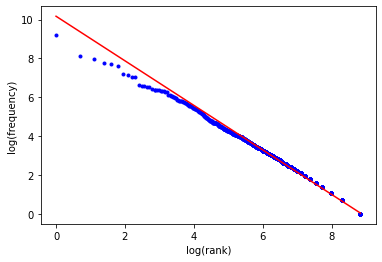

Text(0, 0.5, 'frequency')

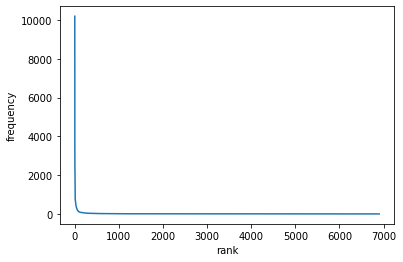

In [ ]:
#Making graphs for Zip's Law by using method of least squares
L = len(counts_sorted)
X = np.array([np.log(L-r+1) for (w, c, r) in counts_sorted])
Y = np.array([np.log(c) for (w, c, r) in counts_sorted])
plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(L)]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, m*X + c, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()
plt.plot([L-r+1 for (_, __, r) in counts_sorted], [c for (_, c, __) in counts_sorted])
plt.xlabel('rank')
plt.ylabel('frequency')

# freq = c.r^-alpha
# log freq = log c -alpha log(r)
# y = c + mx

[(0, ('goblin', 1)),
 (1, ('rashness', 1)),
 (2, ('melt', 1)),
 (3, ('fooled', 1)),
 (4, ('springing', 1)),
 (5, ('transparent', 1)),
 (6, ('speaks', 1)),
 (7, ('elemental', 1)),
 (8, ('lethean', 1)),
 (9, ('excused', 1))]

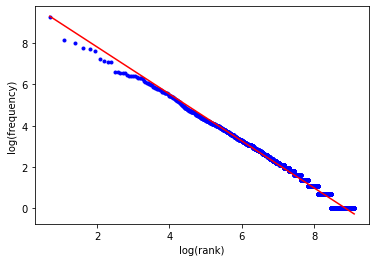

In [ ]:
counts_sorted_ = sorted(counts, key=lambda _:_[1])
counts_with_rank = list(enumerate(counts_sorted_))
# plt.plot()
# print(counts_with_rank[:10])
L_ = len(counts_sorted_)
X_ = np.array([np.log(L-r+1) for (r, (w, c)) in counts_with_rank])
Y_ = np.array([np.log(c) for (r, (w, c)) in counts_with_rank])
plt.plot(X_, Y_, 'b.')
A_ = np.vstack([X_, np.ones(L_)]).T
m_, c_ = np.linalg.lstsq(A_, Y_, rcond=None)[0]
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(X_, m_*X_ + c_, 'r')
# np.shape(A_), np.shape(Y_)
counts_with_rank[:10]

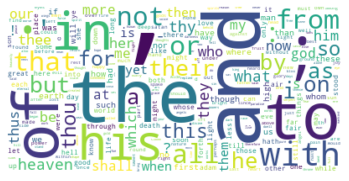

In [ ]:
wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(freq_dict)
# the word cloud is made according to the frequency dictionary made above.
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# here we are printing stopwords

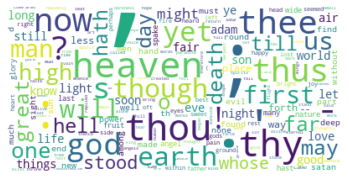

In [ ]:
#This word cloud will show the words after removing the stopwords
stopwords = set(STOPWORDS)
#Below we create a frequency dictionary which does not contain any stopwords
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    freq_dict_[w] = c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

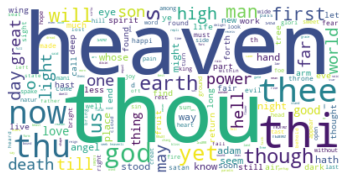

In [ ]:
#Stemming of Corpus
stopwords = set(STOPWORDS)
#Creating a new frequency dictionary after stemming using porter stemmer
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      w = porter.stem(w)
      freq_dict_[w] = freq_dict_.get(w, 0) + c

wc = WordCloud(background_color="white")

wc.generate_from_frequencies(freq_dict_)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()